## Analyzing the medical records to find insights
__________
#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

#### Reading the data into pandas data frame

In [2]:
#Importing CSV data using DataFrame
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Watching info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Perfroming Basic EDA on the given dataset

In [36]:
size = df.size  #Size
shape = df.shape #Shape
print("Dataframe contains : ",shape[0]," rows & ",shape[1]," columns")

Dataframe contains :  1338  rows &  7  columns


In [5]:
#Finding Data type of each attribute
dataType = df.dtypes
print('Data type of each column of Dataframe : \n',dataType)

Data type of each column of Dataframe : 
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [6]:
#Checking the presence of missing values
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [25]:
#Another way to check null values
df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


No column contains any missing values

### Numerical summary of the data is as follows:
1. The minimum
2. Q1 (the first quartile, or the 25% mark).
3. The median.
4. Q3 (the third quartile, or the 75% mark).
5. The maximum.

In [7]:
df.describe().loc[['min','25%','50%','75%','max']]

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


- Looking at the age column, data looks representative of the true age distribution of the adult population
- Very few people have more than 2 children. 75% of the people have 2 or less children

### Visualizing the distribution of data & determining the presence of outliers

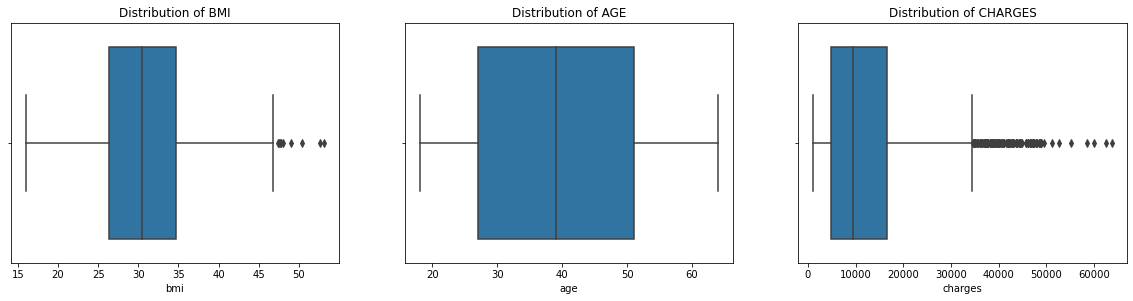

In [31]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='bmi',data=df)
plt.title("Distribution of BMI")
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.title("Distribution of AGE")
sns.boxplot(x='age',data=df)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.title("Distribution of CHARGES")
sns.boxplot(x='charges',data=df)
plt.xlabel('charges')

plt.show()

- The distribution of CHARGES depicts that only a few suffer from diseases whose treatment is very costly (OUTLIERS)
- There are very FEW outliers in case of BMI

### Plots to see the distribution of the continuous features individually

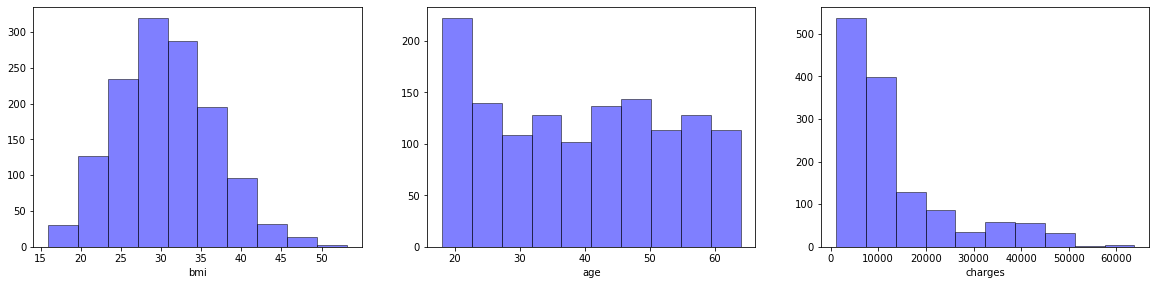

In [29]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='blue', edgecolor = 'black', alpha = 0.5)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age,color='blue', edgecolor = 'black', alpha = 0.5)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='blue', edgecolor = 'black', alpha = 0.5)
plt.xlabel('charges')

plt.show()

- 'BMI' appears to be normally distributed
- 'Age' appears to be uniformly distributed
- As previously indicated, 'charges' are highly skewed

#### Measuring skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [11]:
# skewness along the index axis 
df.skew(axis = 0, skipna = True)[['age','bmi','charges']]

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

### Plots to see the distribution of categorical columns

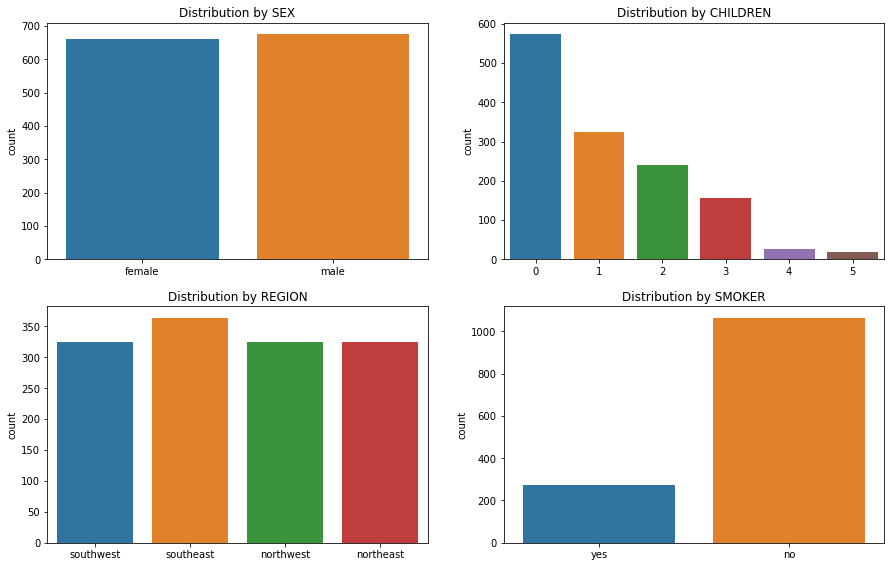

In [49]:
fig = plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
plt.title("Distribution by SEX")
sns.countplot(df["sex"])
plt.xlabel("")

plt.subplot(4,2,2)
plt.title("Distribution by CHILDREN")
sns.countplot(df["children"])
plt.xlabel("")

plt.subplot(4,2,3)
plt.title("Distribution by REGION")
sns.countplot(df["region"])
plt.xlabel("")

plt.subplot(4,2,4)
plt.title("Distribution by SMOKER")
sns.countplot(df["smoker"])
plt.xlabel("")
plt.show()

- The number of non-smokers is more than the number of smokers
- Gender seems to be evenly distributed
- Most instances have less than 2 children and very few have 4 or 5 children

### Pair plot of the data frame

C:\Users\ybhat\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ybhat\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


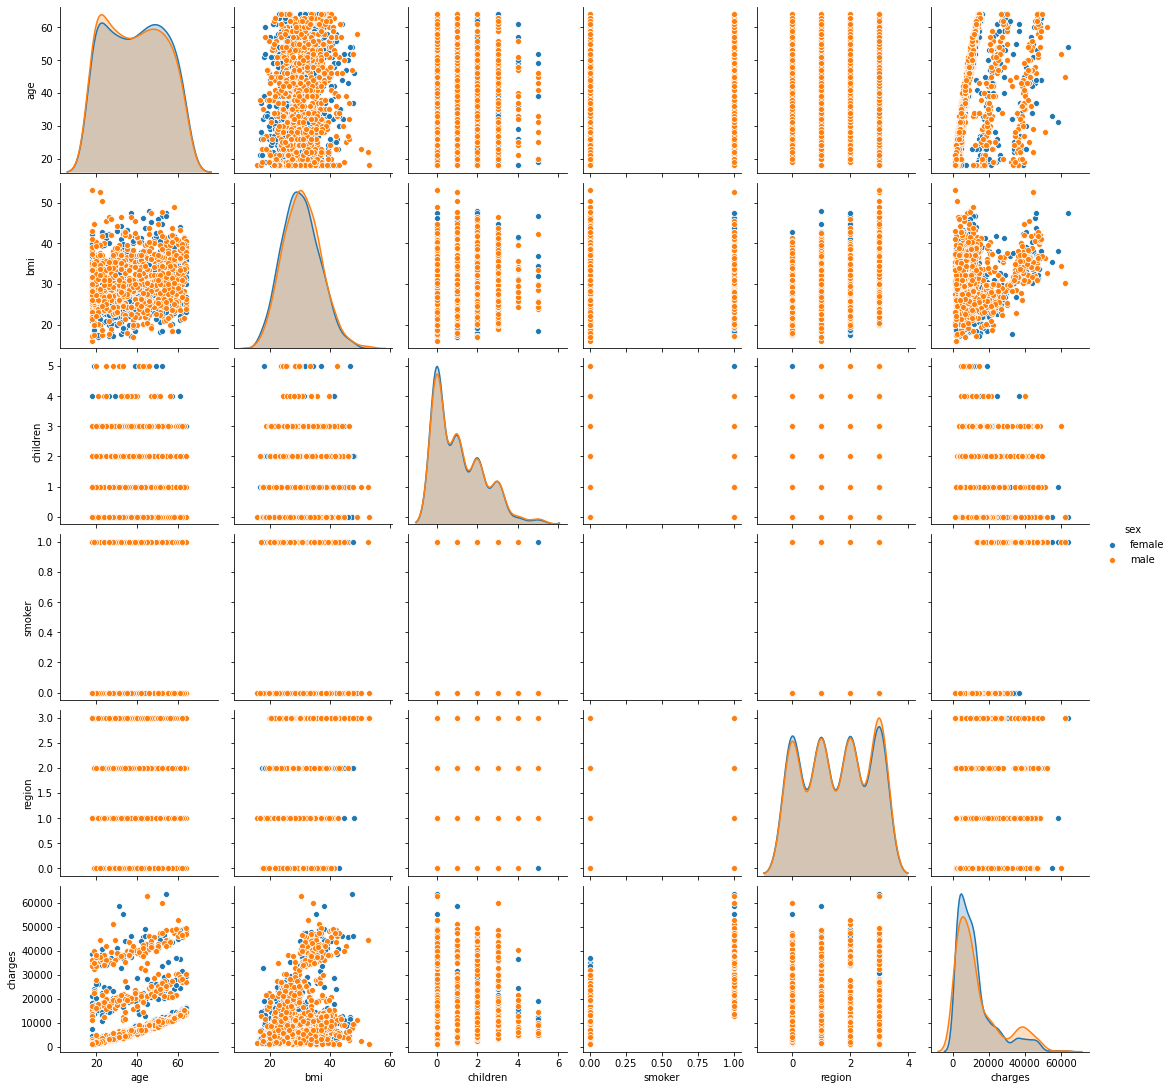

In [50]:
new_df=df.replace(to_replace=["yes","no","northwest","northeast","southwest","southeast"],value=[1,0,0,1,2,3])

sns.pairplot(new_df, hue='sex') 

- The only obvious correlation of 'charges' is with 'smoker'
- Looks like smokers claimed more money than non-smokers
- There's an interesting pattern between 'age' and 'charges. (Could be because for the same ailment, older people are charged more than the younger ones)

### Do charges of people who smoke differ significantly from the people who don't?

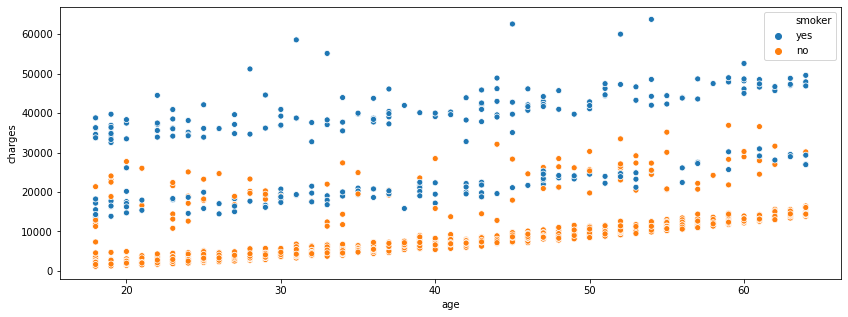

In [57]:
plt.figure(figsize=(14,5))
sns.scatterplot(x="age", y="charges",hue="smoker", data=df)

***Visually the charges of people who smoke are comparatively more than that of non smokers***

#### * *T-test to check dependency of smoking on charges*

In [59]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


##### * Smokers seem to claim significantly more money than non-smokers

### Does bmi of males differ significantly from that of females?

<AxesSubplot:xlabel='age', ylabel='bmi'>

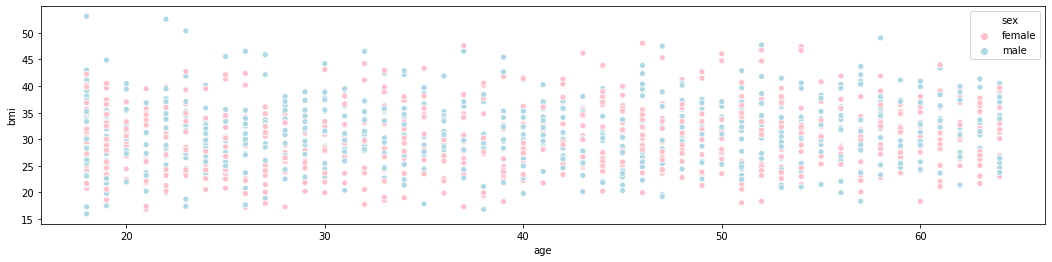

In [85]:
fig = plt.figure(figsize=(18,4))
sns.scatterplot(y='bmi',x='age',hue='sex',data=df,palette= ['pink','lightblue'])

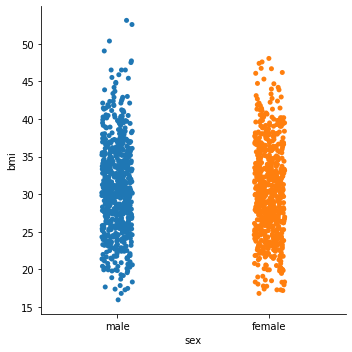

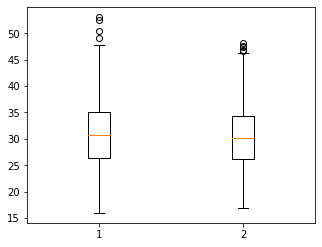

In [105]:
sns.catplot(x="sex", y="bmi", order = ["male","female"],data=df)

fig1 = plt.figure(figsize =(4, 3)) 
data1 =[df.bmi[df["sex"]=="male"],df.bmi[df["sex"]=="female"]]
ax1 = fig1.add_axes([0, 0, 1, 1]) 
bp = ax1.boxplot(data1)        #1-Male, 2-female

*There seems to be no significant difference between these 2 groups*

****Testing this by T-test***

In [107]:
Ho = "BMI of males and females are same"   # Stating the Null Hypothesis
Ha = "BMI of males and females are NOT same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'male'].bmi)  # Selecting BMI corresponding to Males
y = np.array(df[df.smoker == 'female'].bmi) # Selecting BMI corresponding to Females

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

BMI of males and females are same as the p_value (nan) > 0.05


##### * BMI of both genders is similar

### Is the proportion of smokers significantly different in different genders?

In [21]:
Count_Non_Smoker_male = df[df['sex']=='male'].groupby('smoker').count().loc['no'][0]
Count_Smoker_male = df[df['sex']=='male'].groupby('smoker').count().loc['yes'][0]
Count_Non_Smoker_female = df[df['sex']=='female'].groupby('smoker').count().loc['no'][0]
Count_Smoker_female = df[df['sex']=='female'].groupby('smoker').count().loc['yes'][0]

In [22]:
Percent_Female_Smokers = Count_Smoker_female*100 / (Count_Smoker_female + Count_Non_Smoker_female)
Percent_male_Smokers = Count_Smoker_male*100 / (Count_Smoker_male + Count_Non_Smoker_male)

In [23]:
print ("Percentage of male smokers   : ",round(Percent_male_Smokers,2),"%")
print ("Percentage of female smokers : ",round(Percent_Female_Smokers,2),"%")

Percentage of male smokers   :  23.52 %
Percentage of female smokers :  17.37 %


The proportion of males who smoke is more than that of females

##### * Chi_square test to check if smoking habits are different for different genders

In [108]:
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


##### * Proportion of smokers in males is significantly different from that of the females

### Is the distribution of bmi across women with no children, one child and two children, the same ?

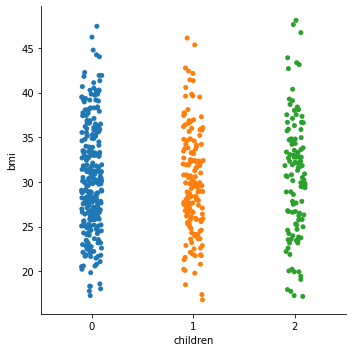

In [24]:
df_child=df[(df["sex"]=="female") & (df["children"]<3)]
sns.catplot(x="children", y="bmi",data=df_child)

The distribution seems to be approximately the same in the mentioned 3 cases

###### *one-way ANOVA test to see if the distributions of bmi values for females having different number of children, are significantly different

In [110]:
# one-way ANOVA test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


##### *BMI is not changed by the number of children a women has

### Is smoking habit different for people of different regions?

In [109]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['smoker'], df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


##### * Smoking habits of people of different regions are similar